## Project Stage - IV (Dashboard)

## Goals

The final stage aims a developing a simple interactive dashboard based on the analysis you have done so far. In this we will be utilizing Plotly (https://plotly.com/) along with Dash (https://plotly.com/dash/) as our framework. 

Refer here for Plotly: https://github.com/UNCG-CSE/CSC-405-605_Fall_2020/blob/master/Class_Resources/Lecture_10/Visualization/03_Plotly/Plotly.ipynb

Getting started with Dash: https://www.youtube.com/watch?v=hSPmj7mK6ng

*PS: This can be invoked from Jupyter, see here: https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e*

### Tasks:

#### Task 1: (70 pts)
- Team: (30)
    - Main graph
        - Allow for selection of date to show the trend of COVID-19 cases and deaths. 
        - Allow for linear or log mode selection on the number of cases and deaths.
        - Incorporate your best model prediction trend line - Linear / Machine Learning (Decision Trees, Random Forest) and ARIMA you have identified in the previous stage. 
        - Ex: https://ourworldindata.org/coronavirus
        
#### Task 2: (30 pts)
- Team: (30)
    - Trend
        - Plot the trend line using moving average (https://en.wikipedia.org/wiki/Moving_average). Use 7-day moving average. 
    - Map 
        - Show US map of cases or deaths (normalized by population). Entire US with county level information. Use mean of county population to normalize for cases and deaths. 
        - Ex: https://coronavirus.jhu.edu/us-map
    

**Deliverable**
- Take screenshots of Report upload on canvas.
- Each member creates separate notebooks for member tasks. Upload all notebooks to Github Repository. 

## Deadline: 11/30/2020

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from urllib.request import urlopen
import json

In [2]:
# Plotly GeoJSon
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

### Import CSV Files

In [3]:
cases = pd.read_csv("covid_confirmed_usafacts.csv")
deaths = pd.read_csv("covid_deaths_usafacts.csv")
population = pd.read_csv("covid_county_population_usafacts.csv")

### Map of US of Cases

#### Mean of County Population

In [4]:
# Replace 0 with NaN
population['population'].replace(0, np.nan, inplace=True)

In [5]:
# Mean of population
population['population'].mean(skipna = True)

104468.33959261616

#### Normalize by Population

In [6]:
# Cases showing only  most recent date
cases = cases.iloc[:,[0,1,2,-1]]
cases['11/27/20'].replace(0, np.nan, inplace = True)

In [7]:
# Merge cases dataframe and population dataframe
df = cases.merge(population)
df['cases_by_pop'] = (df['11/27/20'] / df['population'] ) * 100000
df = df.dropna()
df['countyFIPS'] = df['countyFIPS'].apply(lambda x: str(x).zfill(5))
df

,countyFIPS,County Name,State,11/27/20,population,cases_by_pop
1,01001,Autauga County,AL,2716.0,55869.0,4861.372138
2,01003,Baldwin County,AL,8603.0,223234.0,3853.803632
3,01005,Barbour County,AL,1171.0,24686.0,4743.579357
4,01007,Bibb County,AL,1173.0,22394.0,5238.010181
5,01009,Blount County,AL,2888.0,57826.0,4994.293225
...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,1780.0,42343.0,4203.764495
3189,56039,Teton County,WY,1570.0,23464.0,6691.101262
3190,56041,Uinta County,WY,1037.0,20226.0,5127.064175
3191,56043,Washakie County,WY,417.0,7805.0,5342.729020


#### Entire US with County Level Information

In [8]:
# app name
app = JupyterDash(__name__)

In [9]:
app.layout = html.Div([
    
    # Title of Dashboard
    html.H1("Map of US COVID-19 Cases", style={'text-align': 'center'}),
    
    # Dropdown in top left corner
    dcc.Dropdown(id="slct_date",
                 options=[
                     {"label": '11/27/20', "value": '11/17/20'}],
                 multi=False,
                 # Default value
                 value='11/27/20',
                 style={'width': "40%"}
                 ),
    
    html.Div(id='output_container', children=[]),
    html.Br(),
    
    # The USA Map
    dcc.Graph(id='usa_covid_map', figure={})

])

In [10]:
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='usa_covid_map', component_property='figure')],
    [Input(component_id='slct_date', component_property='value')]
)
# Function for callback, updating map
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))
    
    container = "The date chosen by user was: {}".format(option_slctd)

    # Copy of dataframe
    dff = df.copy()

    # USA Map
    fig = px.choropleth(dff, geojson=counties, locations='countyFIPS', color='cases_by_pop',
                           color_continuous_scale="Viridis",
                           range_color=(0, 7000),
                           scope="usa",
                           labels={'cases_by_pop':'confirmed per 100000'}
                          )
    return container, fig

In [11]:
# Running server
if __name__ == '__main__':
    app.run_server(mode = 'external')

Dash app running on http://127.0.0.1:8050/
11/27/20
<class 'str'>


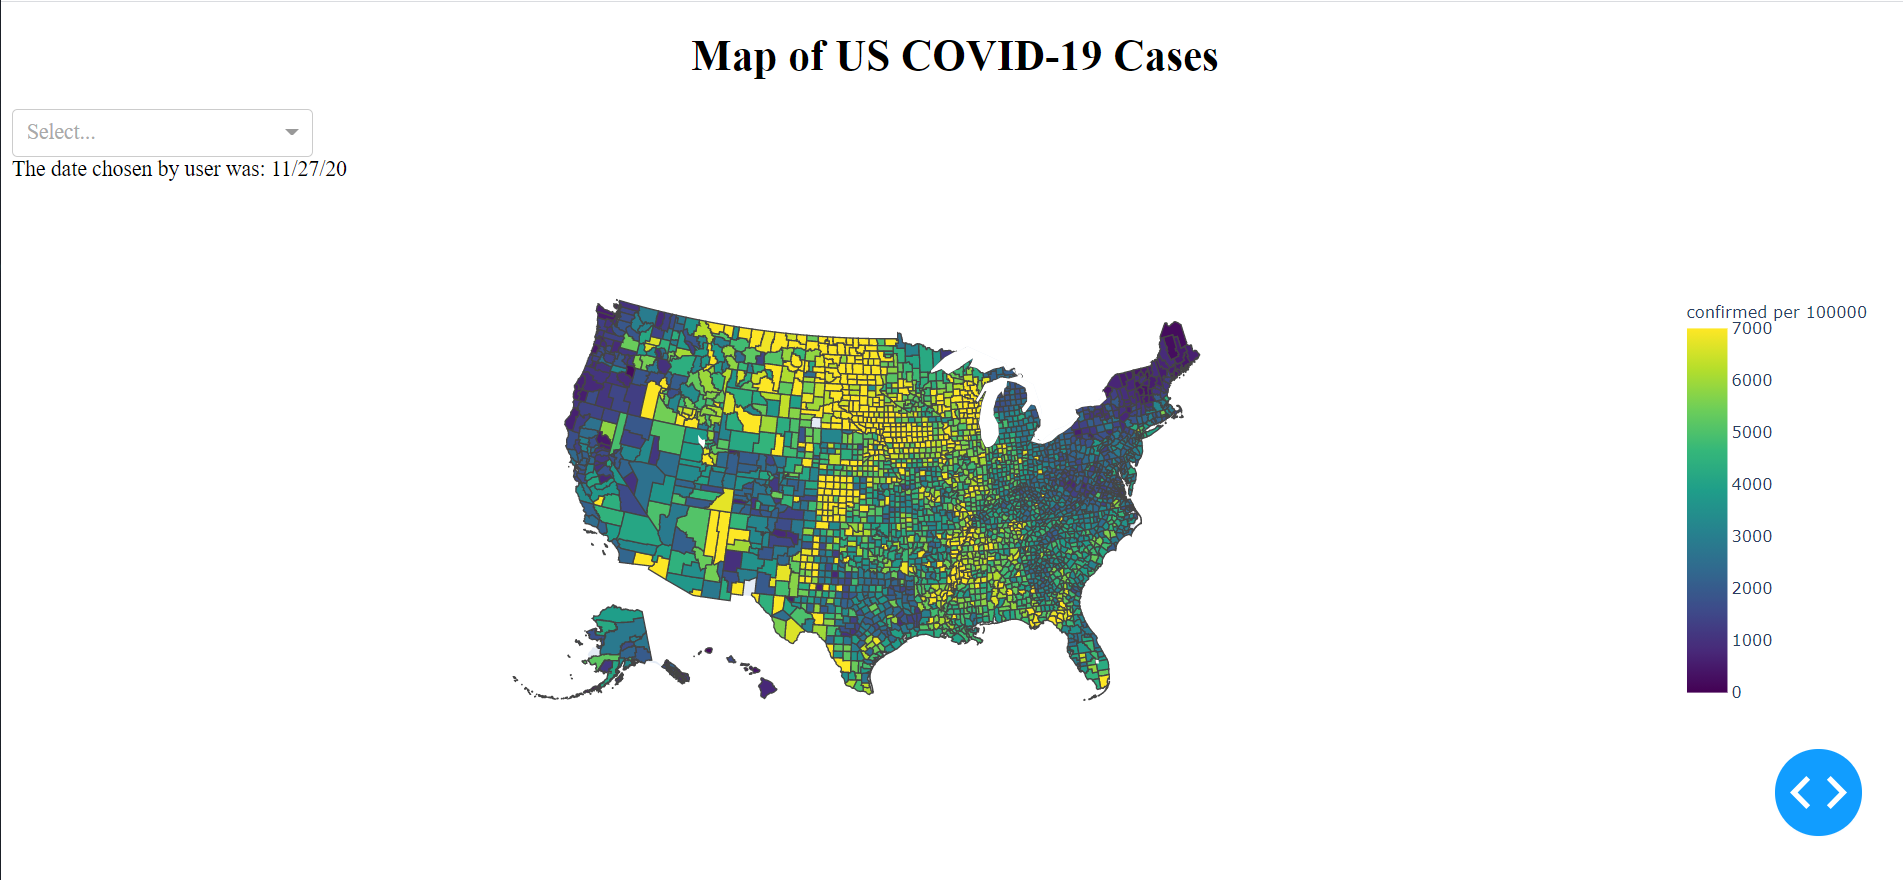

In [12]:
from IPython.display import Image
Image(filename='map.png') 